Krzysztof Swędzioł 418001 MOWNiT Laboratorium2

Zadanie 1

In [3]:
function binary_representation(x::AbstractFloat)
    println("Binarna wersja x to ", x, ": ", bitstring(x))
end

# 1/3 w różnych typach float
num_float16 = Float16(1/3)
num_float32 = Float32(1/3)
num_float64 = Float64(1/3)

# wypisanie wartości
println("Float16:")
binary_representation(num_float16)

println("Float32:")
binary_representation(num_float32)

println("Float64:")
binary_representation(num_float64)

# rzutowanie floatów
num_float16_to_float64 = Float64(num_float16)
println("Float16 casted to Float64:")
binary_representation(num_float16_to_float64)


Float16:
Binarna wersja x to 0.3333: 0011010101010101
Float32:
Binarna wersja x to 0.33333334: 00111110101010101010101010101011
Float64:
Binarna wersja x to 0.3333333333333333: 0011111111010101010101010101010101010101010101010101010101010101
Float16 casted to Float64:
Binarna wersja x to 0.333251953125: 0011111111010101010101000000000000000000000000000000000000000000


Zadanie 2

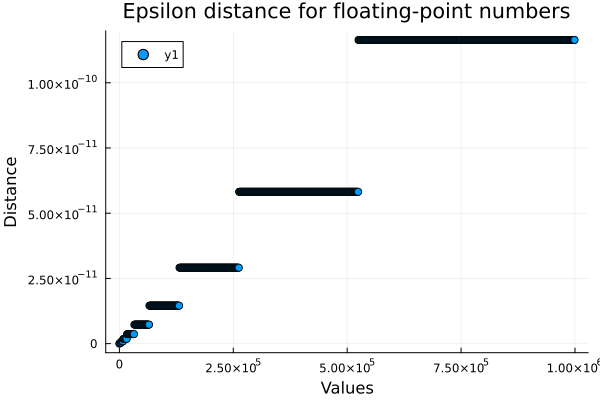

In [1]:
import Pkg;
using Plots

using Plots

# Tworzymy zakres wartości
values = 1.0:1000:1000000.0

# Obliczamy epsilon dla każdej wartości w zakresie
distances = [eps(x) for x in values]

# Tworzymy wykres rozrzutu
scatter(values, distances, xlabel="Values", ylabel="Distance", title="Epsilon distance for floating-point numbers")


Zadanie 3

In [ ]:
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int main() {
    float f = 1.0f; // Start with an initial value of 1.0

    printf("Cecha i mantysa liczby zmiennoprzecinkowej w formacie IEEE:\n");
    for (int i = 0; i < 150; i++) { // We will scale down the number in each iteration
        printf("f = %g:\t", f);
        gsl_ieee_printf_float(&f);
        printf("\n");
        f /= 2.0; // Divide by 2 to get a smaller number
    }

    return 0;
}

![Screenshot from 2024-03-20 21-59-09.png](<attachment:Screenshot from 2024-03-20 21-59-09.png>)
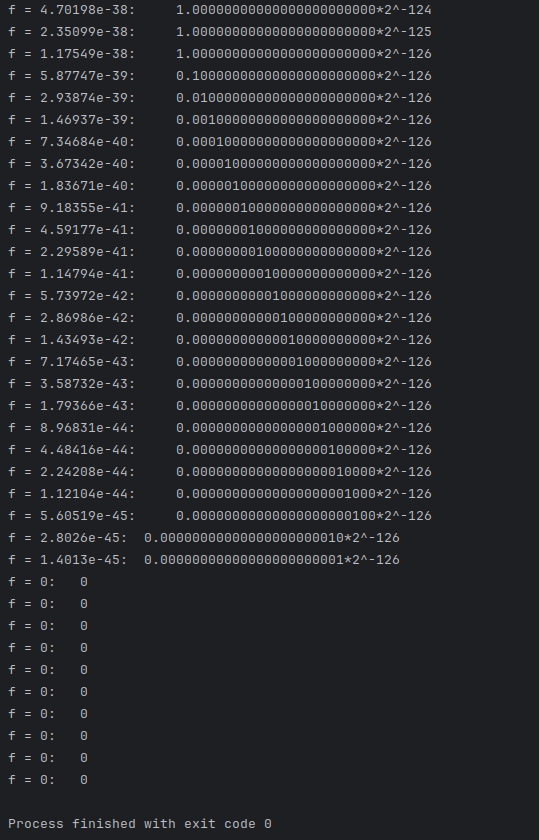

Po wynikach algorytmu widać że w pewnym momencie mantysa denormalizuje się po przekroczeniu cechy

Zadanie 4

Aby zademonstrować przykład niestabilnego algorytmu wezmę pod uwagę proste matymatyczne równanie kwadratowe ax^2 + bx + c = 0 w którym wymuszę odejmowanie bardzo bliskich sobie wartości. Pierwiastki takiego równania to (-b - sqrt(delta))/2a i (-b + sqrt(delta))/2a gdzie delta = b^2 - 4ac.

In [47]:
a = Float16(1.0)
b = Float16(-7.503)
c = Float16(0.004)
delta = sqrt(b^2 - 4*a*c)



Float16(7.504)

Jak widzimy, delta jest bardzo podobna do naszej wartości b. Będziemy chcieli teraz zbadać jak się zachowa nasz algorytm przy obliczaniu pierwiastków w którym występuje odejmowanie tych wartości

In [56]:
if delta ≥ 0
    x1 = (-b - delta) / (2*a)
end

Float16(0.0)

In [55]:
if delta ≥ 0
    x2 = (-b + delta) / (2*a)
end

Float16(7.504)

Jak widzimy, wartości te nie zgadzają się z tym czego byśmy oczekiwali. Różnica gubi wartości. Możemy prześledzić zapis bitowy : 

In [45]:
bitstring(delta)

"0100011110000001"

In [48]:
bitstring(-b)

"0100011110000001"

Główny błąd w tym algorytmie wynika z tego, że przy obliczaniu x1, gdzie x1 = (-b - delta) / (2*a), używamy wartości delta i -b, które są bardzo blisko siebie, co prowadzi do zjawiska "cancellation error" (błędu znoszenia). Dzieje się tak z powodu ograniczeń precyzji Float16. X1 zostaje obliczone jako 0.0, co wydaje się być błędnym wynikiem spowodowanym ograniczeniami arytmetyki zmiennoprzecinkowej dla tego typu danych.

Drugi zaś pierwiastek wydaje się być zgodny z prawdą i poprawnie zaokrąglony. W celu poprawy algorytmu można oczywiście zwiększyć pojemność floatów z 16 do np 32 albo 64 ale uznajmy że nie chcemy ingerować w pamięć. Możemy zatem zastosować wzory Vieta do obliczenia pierwszego pierwiastka za pomocą drugiego
x1*x2 = c/a

In [57]:
c/x2

Float16(0.000533)

Jak widzimy taki sposób wyprowadzenia daje dużo bardziej realny wynik który jest znacznie bliższy prawdzie.